In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [18]:
train_info=pd.read_csv("../info/train_info.csv")
train_info=train_info[train_info['clear']==1]
train_info=train_info.groupby(['sha256','subject']).first().reset_index()
train_info['word']=train_info['path'].map(lambda u: u.split("/")[2])
train_info.shape

(64133, 12)

In [26]:
train_info[['word' ,'path']].groupby('word').count().sort_values('path')

path
word        
bed     1709
bird    1725
tree    1726
cat     1728
sheila  1728
wow     1736
happy   1737
marvin  1739
dog     1742
house   1746
up      2310
off     2325
left    2331
eight   2333
three   2334
right   2338
go      2339
five    2339
nine    2340
two     2341
four    2341
down    2343
on      2343
six     2344
one     2346
yes     2349
no      2354
stop    2354
zero    2355
seven   2358

In [27]:
len(set(train_info['subject']))

1880

In [32]:
df=train_info[['word','subject','path']].groupby(['word','subject']).count().reset_index().sort_values('path')
df.shape

(35558, 3)

In [186]:
df.max()

word           zero
subject    fffcabd1
path              7
dtype: object

In [33]:
df[['word','subject']].groupby('word').count().sort_values('subject')

subject
word           
house      1164
off        1168
tree       1170
two        1174
eight      1176
sheila     1176
bed        1177
wow        1177
up         1177
one        1177
happy      1178
left       1179
cat        1180
five       1181
go         1181
nine       1182
zero       1186
marvin     1189
four       1189
seven      1191
stop       1191
bird       1193
right      1194
six        1196
three      1198
on         1198
yes        1200
no         1203
down       1206
dog        1207

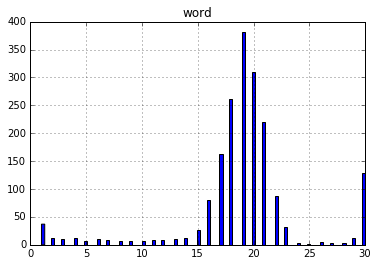

In [34]:
df[['word','subject']].groupby('subject').count().hist(bins=100);

In [136]:
import soundfile
import io
import hashlib
import librosa
from IPython.display import Audio
import scipy.signal
import scipy.io.wavfile as wavfile

In [200]:
def padto16000(x):
    assert len(x) <= 16000
    if len(x)==16000: return x
    #return np.interp(np.arange(16000)/16000.0, np.arange(len(x))/float(len(x)),x)
    n=len(x)
    m=int((16000-n)/2.0)
    if m==0:
        return np.concatenate([x,np.zeros(16000-n-m)]) 
    else:
        return np.concatenate([np.zeros(m),x,np.zeros(16000-n-m)])     
def random_augu(x):
    if random.random()>0.5:
        r=random.random()*0.5+1
        x1=librosa.effects.time_stretch(x,r)
    else:
        n=int((random.random()-0.5)*0.8*24)
        x1=librosa.effects.pitch_shift(x,sr=16000,n_steps=n,bins_per_octave=24)
    return padto16000(x1)

In [204]:
x=soundfile.read('../input/'+'train/audio/tree/1ba20be2_nohash_0.wav')[0]
x.shape,x.dtype

((16000,), dtype('float64'))

In [205]:
random_augu(x).shape

(16000,)

In [206]:
Audio(random_augu(x),rate=16000)

In [159]:
folders=!ls ../input/train/audio/|grep -v .txt | grep -v _backg
str(folders)

"['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']"

In [216]:
!rm -fr ../input/train2
!mkdir -p ../input/train2/audio
for folder in folders:
    !mkdir -p ../input/train2/audio/{folder}

In [218]:
I=0
def make_one(df):

    word=df['word'].iloc[0]
    files=df['path'].values
    
    global I
    if I%500==0: print (I,word),
    I=I+1
    
    #destdir='../input/train2/audio/{}/'.format(word)
    if len(files)>10:
        return len(files)
    else:
        for fname in files:
            fname="../input/"+fname
            x=soundfile.read(fname)[0]
            newfilename=fname.replace("/train/","/train2/")
            assert fname<>newfilename
            x=padto16000(x)
            soundfile.write(newfilename,x,samplerate=16000)
        for i in range(10-len(files)):
            fname="../input/"+random.choice(files,1)[0]
            x=soundfile.read(fname)[0]
            newx=random_augu(x)
            surfix="_c{}.wav".format(i)
            newfilename=fname.replace("/train/","/train2/").replace(".wav",surfix)
            assert fname<>newfilename            
            soundfile.write(newfilename,newx,samplerate=16000)
        return len(files)

In [ ]:
train_info[['subject','word','path']].groupby(['word','subject']).apply(lambda u: make_one(u))

In [224]:
!cp -r ../input/train/audio/_background_noise_/ ../input/train2/audio/

In [220]:
newtrain=train_info[train_info['word']=="AAAAA"]

In [221]:
newtrain

Empty DataFrame
Columns: [sha256, subject, label, path, target, subject_id, id, fold, compress_ratio, compress_ratio2, clear, word]
Index: []

In [229]:
words=set(train_info['word'])
str(words)

"set(['sheila', 'seven', 'right', 'house', 'dog', 'down', 'zero', 'go', 'yes', 'no', 'wow', 'six', 'three', 'bird', 'happy', 'on', 'marvin', 'stop', 'five', 'two', 'one', 'four', 'off', 'tree', 'up', 'bed', 'cat', 'nine', 'eight', 'left'])"

In [240]:
import os
all_files=[]
for word in words:
    files=[u for u in os.listdir('../input/train2/audio/'+str(word)) if u.endswith('.wav')]
    print word, len(files),
    files=["train2/audio/{}/{}".format(word,u) for u in files]
    all_files+=files

sheila 11760 seven 11910 right 11940 house 11640 dog 12070 down 12060 zero 11860 go 11810 yes 12000 no 12030 wow 11770 six 11960 three 11980 bird 11930 happy 11780 on 11980 marvin 11890 stop 11910 five 11810 two 11740 one 11770 four 11890 off 11680 tree 11700 up 11770 bed 11770 cat 11800 nine 11820 eight 11760 left 11790


In [241]:
newtrain['path']=[ u for u in all_files]

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [247]:
subjects=list(set(newtrain['subject']))
subjects=dict(zip(subjects,np.random.permutation(range(len(subjects)))))

In [250]:
newtrain['sha256']=range(len(newtrain))
newtrain['clear']=1
newtrain['subject_id']=newtrain['subject'].map(lambda u: subjects[u])
newtrain['fold']=newtrain['subject_id'].map(lambda u: u%10)
newtrain['id']=range(len(newtrain))
newtrain['subject']=newtrain['path'].map(lambda u: u.split('/')[3].split('_')[0])
newtrain['word']=newtrain['path'].map(lambda u: u.split('/')[2] )

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [252]:
regular_words=['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop',  'up', 'yes']
newtrain['label']=newtrain['word'].map(lambda u: 'unknown' if u not in regular_words else u)

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [253]:
newtrain.head()

sha256   subject    label                                          path  \
0       0  51055bda  unknown  train2/audio/sheila/51055bda_nohash_0_c6.wav   
1       1  b4aa9fef  unknown  train2/audio/sheila/b4aa9fef_nohash_0_c8.wav   
2       2  179a61b7  unknown  train2/audio/sheila/179a61b7_nohash_0_c4.wav   
3       3  6a203e0e  unknown  train2/audio/sheila/6a203e0e_nohash_0_c8.wav   
4       4  1993db46  unknown  train2/audio/sheila/1993db46_nohash_0_c0.wav   

   target  subject_id  id  fold  compress_ratio  compress_ratio2  clear  \
0     NaN         625   0     5             NaN              NaN      1   
1     NaN        1015   1     5             NaN              NaN      1   
2     NaN         772   2     2             NaN              NaN      1   
3     NaN         747   3     7             NaN              NaN      1   
4     NaN         631   4     1             NaN              NaN      1   

     word  
0  sheila  
1  sheila  
2  sheila  
3  sheila  
4  sheila

In [254]:
newtrain['label'].value_counts()

unknown    236610
down        12060
no          12030
yes         12000
on          11980
right       11940
stop        11910
go          11810
left        11790
up          11770
off         11680
Name: label, dtype: int64

In [255]:
newtrain.to_csv("../info/train2_info.csv",index=None)